**Environmental artifacts**
* Persistent oscillations centered around the AC power line frequency (typically 50 or 60 Hz)

* Brief signal jumps due to building vibration (such as a door slamming)

* Electromagnetic field noise from nearby elevators, cell phones, the geomagnetic field, etc.

**Instrumentation artifacts**
* Electromagnetic interference from stimulus presentation (such as EEG sensors picking up the field generated by unshielded headphones)

* Continuous oscillations at specific frequencies used by head position indicator (HPI) coils

* Random high-amplitude fluctuations (or alternatively, constant zero signal) in a single channel due to sensor malfunction (e.g., in surface electrodes, poor scalp contact)

**Biological artifacts**
* Periodic QRS-like signal patterns (especially in magnetometer channels) due to electrical activity of the heart

* Short step-like deflections (especially in frontal EEG channels) due to eye movements

* Large transient deflections (especially in frontal EEG channels) due to blinking

* Brief bursts of high frequency fluctuations across several channels due to the muscular activity during swallowing

In [21]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
import glob

In [3]:
paths = glob.glob("../data/derivatives/*/eeg/*.set")

print("Number of subjects: ", len(paths))

Number of subjects:  88


In [6]:
raw = mne.io.read_raw_eeglab(paths[0], preload=True)

raw


<RawEEGLAB | sub-067_task-eyesclosed_eeg.set, 19 x 321550 (643.1 s), ~46.6 MB, data loaded>

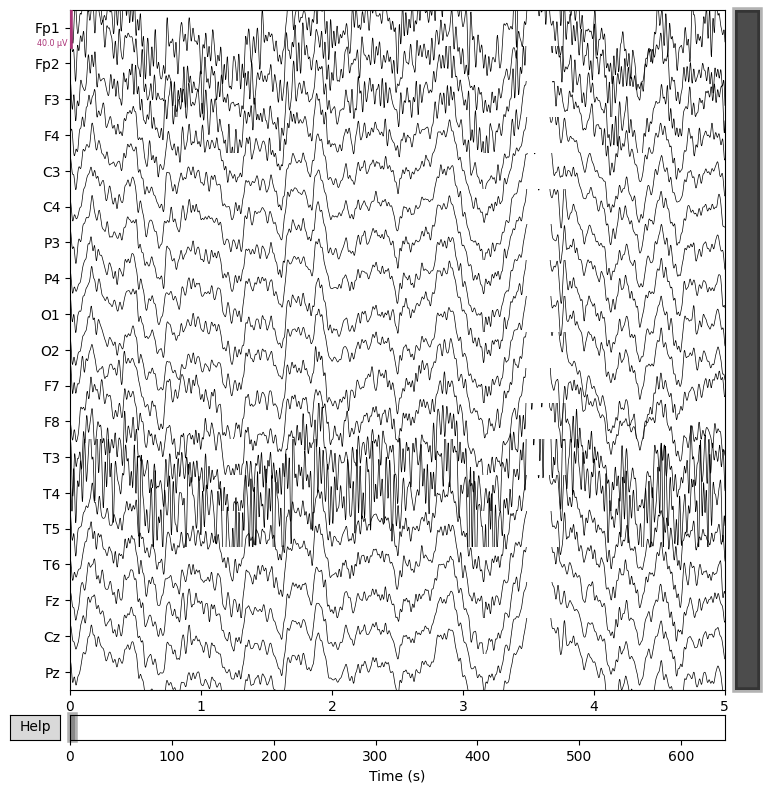

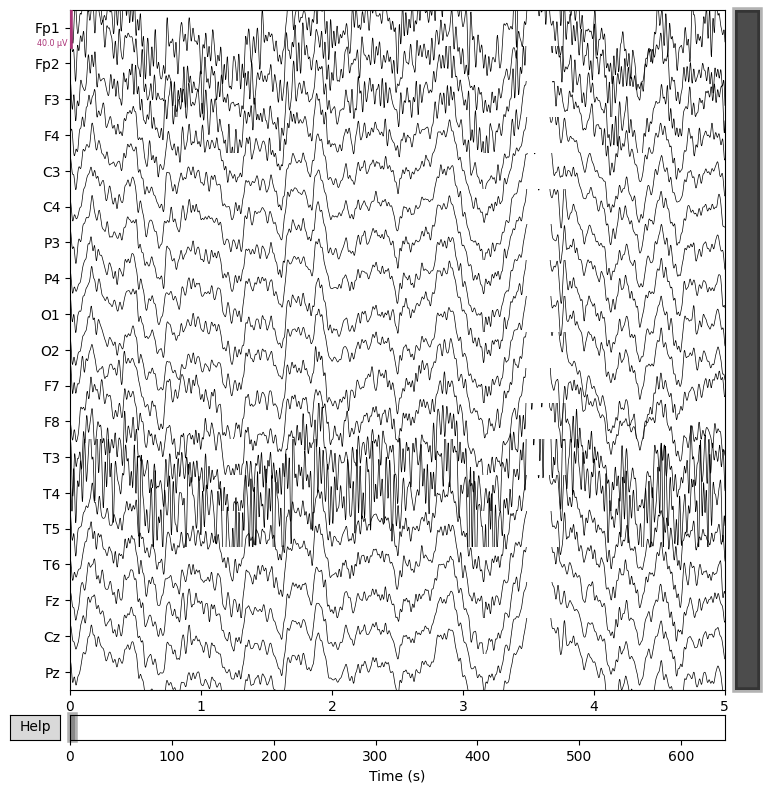

In [8]:
raw.plot(duration=5)

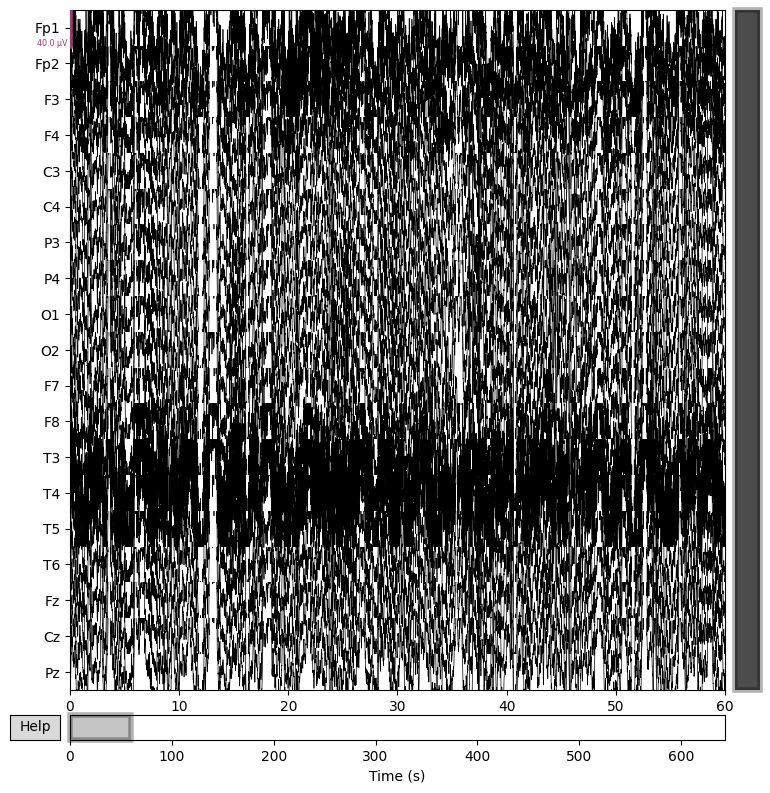

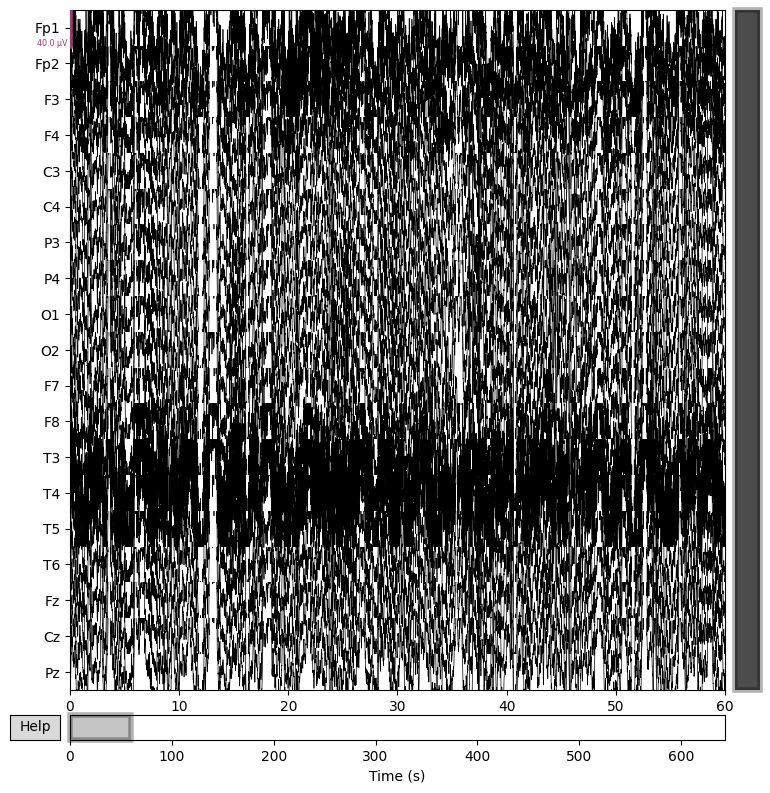

In [13]:
mag_channels = mne.pick_types(raw.info, meg="mag")
raw.plot(duration=60,  remove_dc=False)

Effective window size : 4.096 (s)


/home/zaman/anaconda3/envs/eeg/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


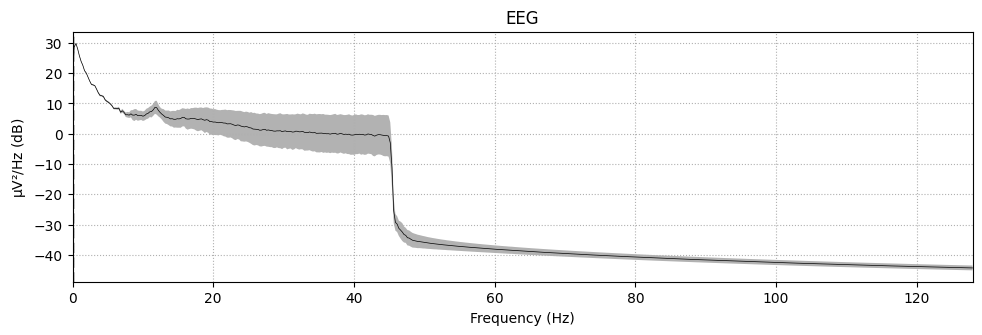

In [23]:
fig = raw.compute_psd(tmax=np.inf, fmax=128).plot(
    average=True, picks="data", exclude="bads"
)

plt.show()

Here we see that the data has already been filtered. 

In [28]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

RuntimeError: No EOG channel(s) found